0. import packages

In [2]:
#!pip uninstall numpy -y
#!pip install numpy==1.26.4
#!pip install --upgrade numpy pandas -y
import numpy as np
#print(np.__version__)
#!pip uninstall pandas -y
#!pip install pandas
import pandas as pd
#print(pd.__version__)
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
current_time = datetime.now()
print(current_time.strftime("%Y-%m-%d %H:%M:%S"))

2025-04-06 13:47:53


In [3]:
ml_pasta_csv="ml_pasta.csv"
ml_pasta = pd.read_csv( ml_pasta_csv )

X: [[9.78000000e+02 3.83307000e+03]
 [1.79000000e+01 5.95000000e+03]
 [9.10000000e+00 6.54600000e+03]
 [1.17200000e+03 3.32349092e+03]
 [1.93000000e+01 6.46600000e+03]
 [3.36300000e+03 2.33711000e+03]
 [5.70000000e+00 6.63900000e+03]
 [3.90600000e+03 2.19946000e+03]
 [2.59000000e+02 3.63000000e+03]
 [3.58000000e+04 2.49513000e+03]
 [2.41000000e+01 5.94400000e+03]
 [1.89000000e+02 5.95000000e+03]
 [8.89900000e+04 8.45120000e+02]
 [7.97600000e+03 9.40080000e+02]
 [1.17400000e+04 1.79475000e+03]
 [8.13000000e+01 5.93825000e+03]
 [7.00000000e+01 4.83445000e+03]
 [6.23900000e+03 3.15759000e+03]
 [9.28300000e+03 7.73630000e+02]
 [1.37000000e+04 1.70000000e+03]
 [1.29600000e+03 1.70615000e+03]
 [2.14000000e+03 4.25365000e+03]
 [5.50700000e+03 9.93890000e+02]]


C:\Users\taohuang\AppData\Local\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


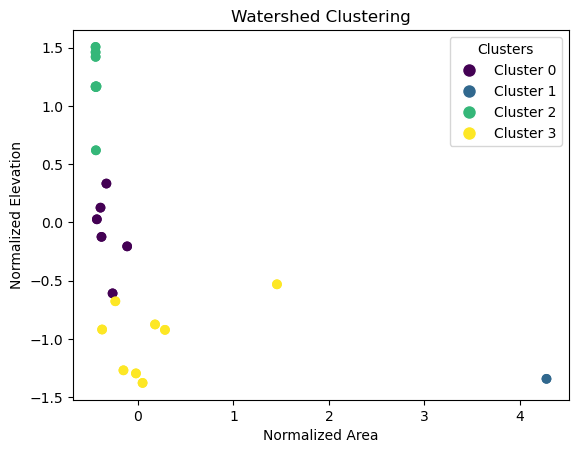

In [4]:
idv = ml_pasta[[  "site_no"
               # ,"amp","RMSE"
                ,"drain_area_va","alt_va"]]
#print( idv)
n_clusters = 4

idv_rm_na = idv.dropna()
#print(idv_rm_na)

array = idv_rm_na[[ "drain_area_va","alt_va" ]].to_numpy()
#print( array)
X=   array #data_normalized #
print("X:", X)

# Normalize the data
scaler = StandardScaler()
data_normalized = scaler.fit_transform( array)

# Perform K-Means Clustering
kmeans = KMeans(n_clusters= n_clusters, random_state=42)
labels = kmeans.fit_predict(data_normalized)
#print(labels)

# Visualize the clusters
plt.scatter(data_normalized[:, 0], data_normalized[:, 1], c=labels, cmap='viridis')

scatter= plt.scatter(data_normalized[:, 0], data_normalized[:, 1], c=labels, cmap='viridis')
# Manually create legend entries for each cluster
legend_labels = [f'Cluster {i}' for i in range(kmeans.n_clusters)]
handles = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=scatter.cmap(scatter.norm(i)), markersize=10) for i in range(kmeans.n_clusters)]
plt.legend(handles, legend_labels, title='Clusters')

plt.xlabel("Normalized Area")
plt.ylabel("Normalized Elevation")
plt.title("Watershed Clustering")

# Save the plot as an image file
plt.savefig('cluster.png'
           # , dpi=300, bbox_inches='tight'
           )


plt.show()

The Elbow Method helps us find this optimal k value.

C:\Users\taohuang\AppData\Local\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\taohuang\AppData\Local\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\taohuang\AppData\Local\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\taohuang\AppData\Local\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.p

Distortion values:
1 : 359138400.1684768
2 : 63445107.72619291
3 : 19372172.068484515
4 : 5164084.432926888
5 : 3171501.998039431


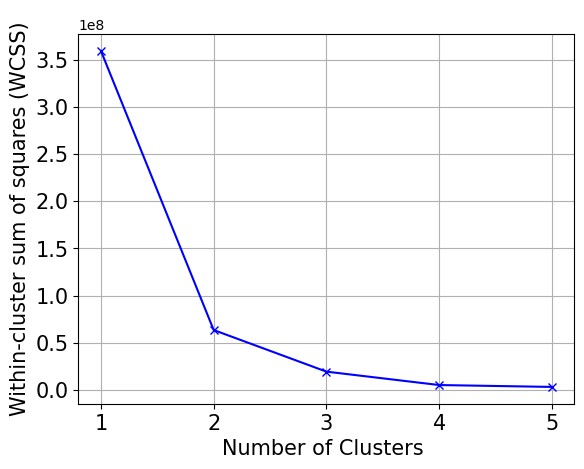

Inertia values:
1 : 8260183203.874967
2 : 1459237477.7024367
3 : 445559957.57514393
4 : 118773941.95731844
5 : 72944545.95490691


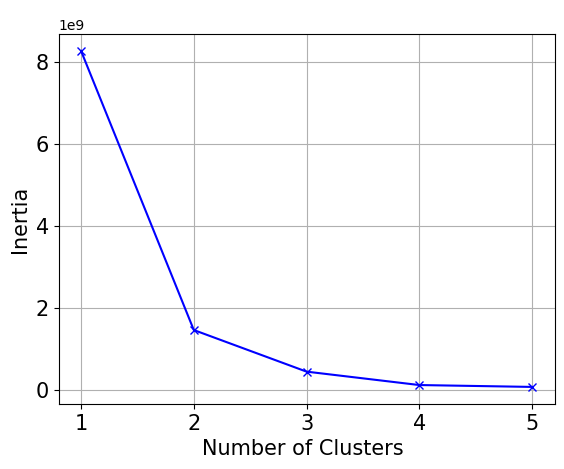

In [6]:
fontsize = 15

#from sklearn import metrics
from scipy.spatial.distance import cdist
#import numpy as np
#import matplotlib.pyplot as plt

# Initialize lists to store distortion and inertia values
distortions = []
inertias = []
mapping1 = {}
mapping2 = {}
K = range(1, 5 + 1 )

# Fit K-means for different values of k
for k in K:
    kmeanModel = KMeans(n_clusters=k, random_state=42).fit(X)
    
    # Calculate distortion as the average squared distance from points to their cluster centers
    distortions.append(sum(np.min(cdist(X, kmeanModel.cluster_centers_, 'euclidean'), axis=1)**2) / X.shape[0])
    
    # Inertia is calculated directly by KMeans
    inertias.append(kmeanModel.inertia_)
    
    # Store the mappings for easy access
    mapping1[k] = distortions[-1]
    mapping2[k] = inertias[-1]

print("Distortion values:")
for key, val in mapping1.items():
    print(f'{key} : {val}')
# Plotting the graph of k versus Distortion
plt.plot(K, distortions, 'bx-')
plt.xticks(K , fontsize = fontsize )
plt.yticks(  fontsize = fontsize )
plt.xlabel('Number of Clusters ' , fontsize = fontsize )
plt.ylabel('Within-cluster sum of squares (WCSS)' , fontsize = fontsize )
plt.title(' ' , fontsize = fontsize )
plt.grid()
# Save the plot as an image file
plt.savefig('Distortion.png'
           # , dpi=300, bbox_inches='tight'
           )

plt.show()

print("Inertia values:")
for key, val in mapping2.items():
    print(f'{key} : {val}')
# Plotting the graph of k versus Inertia
plt.plot(K, inertias, 'bx-')
plt.xticks(K , fontsize = fontsize )
plt.yticks(  fontsize = fontsize )
plt.xlabel('Number of Clusters ' , fontsize = fontsize )
plt.ylabel('Inertia' , fontsize = fontsize )
plt.title(' ' , fontsize = fontsize )
plt.grid()
plt.show()

In [7]:
idv_rm_na['labels'] = labels

# Define the mapping
value_mapping = {
    1: 'Huge',
    0: "Mid-Elevation Medium Streams", #"Med_Elev_Med",
    2: "High-Elevation Small Streams", # High_Elev_Small
    3: "Low-Elevation Large Streams" #"Low_Elev_Large"
}

# Replace values in the 'category' column
idv_rm_na['labels'] = idv_rm_na['labels'].replace(value_mapping)

# View the resulting DataFrame
print(idv_rm_na)

     site_no  drain_area_va      alt_va                        labels
0   13190500          978.0  3833.07000  Mid-Elevation Medium Streams
1   13311450           17.9  5950.00000  High-Elevation Small Streams
2   13310800            9.1  6546.00000  High-Elevation Small Streams
3   13192200         1172.0  3323.49092  Mid-Elevation Medium Streams
4   13311000           19.3  6466.00000  High-Elevation Small Streams
5   13211205         3363.0  2337.11000  Mid-Elevation Medium Streams
6   13310850            5.7  6639.00000  High-Elevation Small Streams
7   13213000         3906.0  2199.46000   Low-Elevation Large Streams
8   13092747          259.0  3630.00000  Mid-Elevation Medium Streams
9   13154500        35800.0  2495.13000   Low-Elevation Large Streams
10  13311250           24.1  5944.00000  High-Elevation Small Streams
11  13296000          189.0  5950.00000  High-Elevation Small Streams
12  13317660        88990.0   845.12000                          Huge
13  13341050        

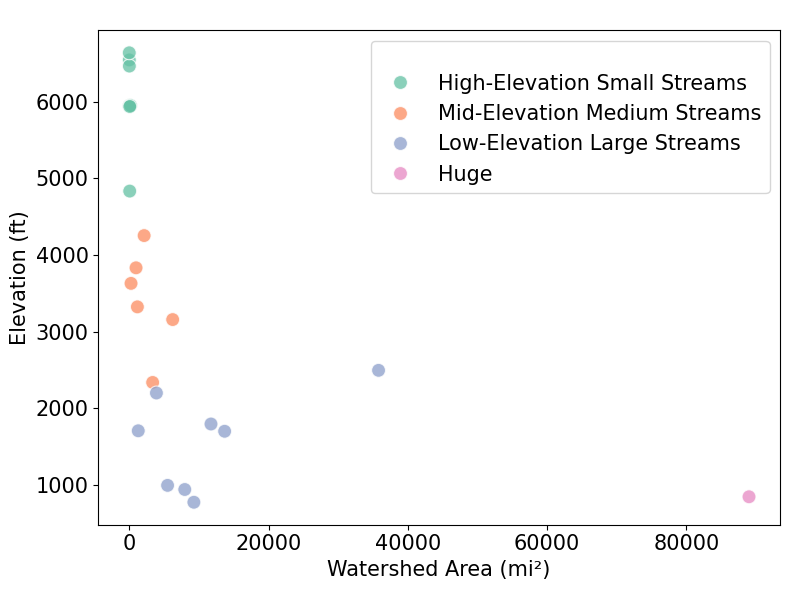

In [8]:
plt.figure(figsize=(8, 6))

fontsize = 15

hue_order= [ "High-Elevation Small Streams",  
    "Mid-Elevation Medium Streams",
    "Low-Elevation Large Streams"  ,
    'Huge' ]

sns.scatterplot(
    data=idv_rm_na,
    x='drain_area_va',
    y='alt_va',
    hue='labels',  # Color points by the 'labels' column
    hue_order=hue_order,
    palette='Set2',  # Choose a color palette
    s=100  # Adjust marker size
    , alpha = 0.76
    
)

# Add labels and title
plt.xlabel("Watershed Area (mi\u00b2)" ,fontsize= fontsize )
plt.ylabel("Elevation (ft)" ,fontsize= fontsize )
plt.title(" ")

plt.xticks(  fontsize= fontsize )
plt.yticks(  fontsize= fontsize )

# Show legend and plot
plt.legend(title=" " ,fontsize= fontsize)

plt.tight_layout()

plt.savefig('ws_cluster.png'
           # , dpi=300, bbox_inches='tight'
           )

plt.show()

In [9]:
idv_rm_na['drain_area_km2'] = idv_rm_na['drain_area_va'] * (1.60934 ** 2)
idv_rm_na['alt_m'] = idv_rm_na['alt_va'] * 0.3048
idv_rm_na

,site_no,drain_area_va,alt_va,labels,drain_area_km2,alt_m
0,13190500,978.0,3833.07000,Mid-Elevation Medium Streams,2532.995780,1168.319736
1,13311450,17.9,5950.00000,High-Elevation Small Streams,46.360557,1813.560000
2,13310800,9.1,6546.00000,High-Elevation Small Streams,23.568775,1995.220800
3,13192200,1172.0,3323.49092,Mid-Elevation Medium Streams,3035.450976,1013.000032
4,13311000,19.3,6466.00000,High-Elevation Small Streams,49.986522,1970.836800
5,13211205,3363.0,2337.11000,Mid-Elevation Medium Streams,8710.086717,712.351128
6,13310850,5.7,6639.00000,High-Elevation Small Streams,14.762859,2023.567200
7,13213000,3906.0,2199.46000,Low-Elevation Large Streams,10116.443270,670.395408
8,13092747,259.0,3630.00000,Mid-Elevation Medium Streams,670.803586,1106.424000
9,13154500,35800.0,2495.13000,Low-Elevation Large Streams,92721.113434,760.515624


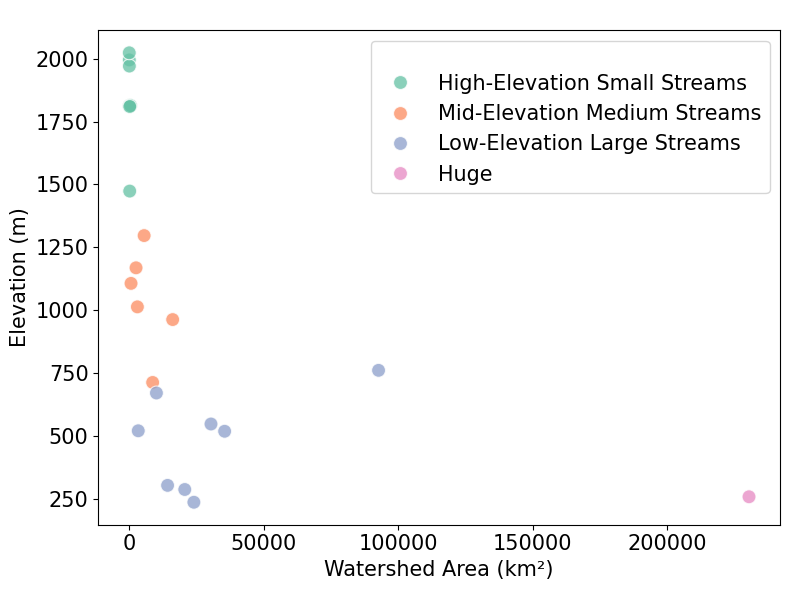

In [10]:
plt.figure(figsize=(8, 6))

fontsize = 15

hue_order= [ "High-Elevation Small Streams",  
    "Mid-Elevation Medium Streams",
    "Low-Elevation Large Streams"  ,
    'Huge' ]

sns.scatterplot(
    data=idv_rm_na,
    x='drain_area_km2',
    y='alt_m',
    hue='labels',  # Color points by the 'labels' column
    hue_order=hue_order,
    palette='Set2',  # Choose a color palette
    s=100  # Adjust marker size
    , alpha = 0.76
    
)

# Add labels and title
plt.xlabel("Watershed Area (km\u00b2)" ,fontsize= fontsize )
plt.ylabel("Elevation (m)" ,fontsize= fontsize )
plt.title(" ")

plt.xticks(  fontsize= fontsize )
plt.yticks(  fontsize= fontsize )

# Show legend and plot
plt.legend(title=" " ,fontsize= fontsize)

plt.tight_layout()

plt.savefig('ws_cluster_m_km2.png'
           # , dpi=300, bbox_inches='tight'
           )

plt.show()

[[-0.31964459 -0.07556507]
 [ 4.27824841 -1.34321643]
 [-0.44205746  1.20861811]
 [ 0.14700985 -0.98404225]]
cluster_points: [[-0.39291345  0.12637699]
 [-0.38261707 -0.1242544 ]
 [-0.26633161 -0.60939602]
 [-0.43107376  0.02649904]
 [-0.11369036 -0.20585111]
 [-0.33124129  0.33323507]]
distances: [0.214823   0.07960015 0.53648649 0.15110772 0.24370391 0.4089646 ]
closest_original_index: 3
cluster_points: [[ 4.27824841 -1.34321643]]
distances: [0.]
closest_original_index: 12
cluster_points: [[-0.44386994  1.16756791]
 [-0.44433699  1.46070457]
 [-0.44379564  1.42135737]
 [-0.44451744  1.50644569]
 [-0.44354088  1.16461687]
 [-0.43478895  1.16756791]
 [-0.44050504  1.16178879]
 [-0.44110478  0.61889576]]
distances: [0.04109019 0.25209677 0.21274636 0.29783774 0.04402624 0.04168873
 0.04685504 0.58972312]
closest_original_index: 1
cluster_points: [[-0.23751235 -0.6770978 ]
 [ 1.45523451 -0.53167546]
 [-0.02150057 -1.2965113 ]
 [ 0.17827052 -0.87615038]
 [ 0.04786734 -1.37837807]
 [ 0.282

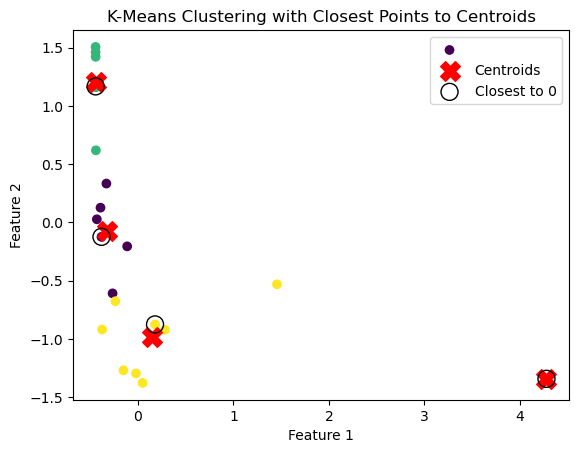

In [11]:
centroids = kmeans.cluster_centers_
print(centroids)

data = data_normalized #X
#print(data)

closest_points = {}
closest_indices = {}
closest_original_index_list = []

    # Iterate through each cluster
for i in range(n_clusters):
        # Get the data points belonging to the current cluster
    cluster_points = data[labels == i]
    print("cluster_points:",cluster_points)
    distances = cdist([centroids[i]], cluster_points)[0]
    print("distances:",distances)
                # Find the index of the point with the minimum distance
    closest_index_within_cluster = np.argmin(distances)

            # Get the actual data point closest to the centroid
    closest_point = cluster_points[closest_index_within_cluster]

            # Find the index of the closest point in the original data
    original_indices_in_cluster = np.where(labels == i)[0]
    closest_original_index = original_indices_in_cluster[closest_index_within_cluster]

    closest_points[i] = closest_point
    closest_indices[i] = closest_original_index
    print( "closest_original_index:", closest_original_index)
    closest_original_index_list.append(closest_original_index)

print("closest_original_index_list:", closest_original_index_list)
#print("closest_points:",closest_points)
#print("closest_indices:",closest_indices)
#print("type closest_indices:", type(closest_indices) )

plt.scatter(data[:, 0], data[:, 1], c=kmeans.labels_, cmap='viridis', label=' ')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], marker='X', s=200, color='red', label='Centroids')
for i, point in closest_points.items():
    if point is not None:
        plt.scatter(point[0], point[1], marker='o', s=150, facecolors='none', edgecolors='black', label=f'Closest to {i}' if i == 0 else "")
plt.title('K-Means Clustering with Closest Points to Centroids')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.show()

In [12]:


subset_df = idv_rm_na.loc[closest_original_index_list]

print(subset_df)

     site_no  drain_area_va      alt_va                        labels  \
3   13192200         1172.0  3323.49092  Mid-Elevation Medium Streams   
12  13317660        88990.0   845.12000                          Huge   
1   13311450           17.9  5950.00000  High-Elevation Small Streams   
14  12305000        11740.0  1794.75000   Low-Elevation Large Streams   

    drain_area_km2        alt_m  
3      3035.450976  1013.000032  
12   230481.896216   257.592576  
1        46.360557  1813.560000  
14    30406.309266   547.039800  


i: 0
i: 1
i: 2
i: 3


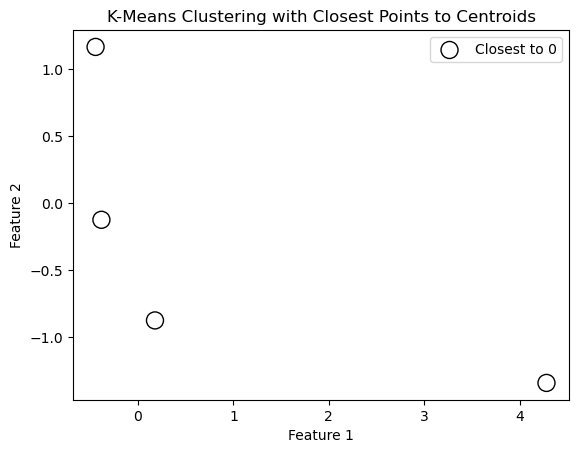

In [13]:
for i, point in closest_points.items():
    print("i:", i)
    if point is not None:
        plt.scatter(point[0], point[1], marker='o', s=150, facecolors='none', edgecolors='black', label=f'Closest to {i}' if i == 0 else "")
plt.title('K-Means Clustering with Closest Points to Centroids')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.show()

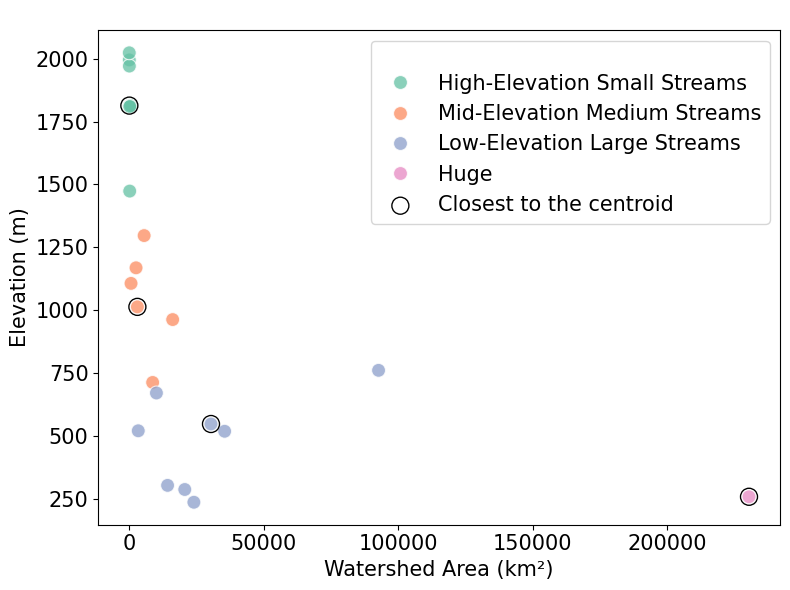

In [14]:
plt.figure(figsize=(8, 6))

fontsize = 15

hue_order= [ "High-Elevation Small Streams",  
    "Mid-Elevation Medium Streams",
    "Low-Elevation Large Streams"  ,
    'Huge' ]

sns.scatterplot(
    data=idv_rm_na,
    x='drain_area_km2',
    y='alt_m',
    hue='labels',  # Color points by the 'labels' column
    hue_order=hue_order,
    palette='Set2',  # Choose a color palette
    s=100  # Adjust marker size
    , alpha = 0.76
    
)

sns.scatterplot(
    data= subset_df,
    x='drain_area_km2',
    y='alt_m',
     marker='o', s=150, facecolors='none', edgecolors='black', label=f'Closest to the centroid'
    #hue='labels',  # Color points by the 'labels' column
    #hue_order=hue_order,
    #palette='Set2',  # Choose a color palette
    #s=100  # Adjust marker size
    #, alpha = 0.76
    
)

# Add labels and title
plt.xlabel("Watershed Area (km\u00b2)" ,fontsize= fontsize )
plt.ylabel("Elevation (m)" ,fontsize= fontsize )
plt.title(" ")

plt.xticks(  fontsize= fontsize )
plt.yticks(  fontsize= fontsize )

# Show legend and plot
plt.legend(title=" " ,fontsize= fontsize)

plt.tight_layout()

plt.savefig('ws_cluster_m_km2_centroid.png'
           # , dpi=300, bbox_inches='tight'
           )

plt.show()